In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import dotenv
import os
import json
import requests
import tmdbsimple as tmdb #to label genres

In [166]:
import time

In [168]:
import random

In [10]:
#load key
dotenv.load_dotenv()
tmdb_key = os.getenv('TMDB_KEY_S')

In [11]:
#set key
tmdb.API_KEY = tmdb_key

In [5]:
# genre obj
genre = tmdb.Genres()

#all available genres
genres_lst = genre.movie_list()

In [140]:
gen = []
for x in genre_dict:
    gen.append(genre_dict[x])

In [6]:
#genre dict to use as dict
genre_dict ={}
for x in genres_lst['genres']:
    genre_dict[x['id']] = x['name']
genre_dict

{28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western'}

In [ ]:
#search obj
search = tmdb.Search()

__________________________________________________________________________________________________

### Load Rated Movies

In [154]:
#get rating csv
films = pd.read_csv('ratings.csv')
films

,Date,Name,Year,Letterboxd URI,Rating
0,2021-01-12,Spider-Man: Into the Spider-Verse,2018,https://boxd.it/azpY,5.0
1,2021-01-12,Portrait of a Lady on Fire,2019,https://boxd.it/jkPq,5.0
2,2021-01-12,The Handmaiden,2016,https://boxd.it/948A,5.0
3,2022-07-01,Swiss Army Man,2016,https://boxd.it/bDG2,4.5
4,2022-07-07,Everything Everywhere All at Once,2022,https://boxd.it/jUk4,5.0
...,...,...,...,...,...
192,2025-10-28,Mufasa: The Lion King,2024,https://boxd.it/sE9C,2.0
193,2025-10-30,Vampyres,1974,https://boxd.it/1kmW,3.0
194,2025-11-05,Bugonia,2025,https://boxd.it/qeWY,3.5
195,2025-11-05,Chainsaw Man – The Movie: Reze Arc,2025,https://boxd.it/Kgyu,4.5


In [155]:
#put the years into a decade range

films['decade'] = films['Year'].apply(lambda x: x // 10 * 10)

In [156]:
films

,Date,Name,Year,Letterboxd URI,Rating,decade
0,2021-01-12,Spider-Man: Into the Spider-Verse,2018,https://boxd.it/azpY,5.0,2010
1,2021-01-12,Portrait of a Lady on Fire,2019,https://boxd.it/jkPq,5.0,2010
2,2021-01-12,The Handmaiden,2016,https://boxd.it/948A,5.0,2010
3,2022-07-01,Swiss Army Man,2016,https://boxd.it/bDG2,4.5,2010
4,2022-07-07,Everything Everywhere All at Once,2022,https://boxd.it/jUk4,5.0,2020
...,...,...,...,...,...,...
192,2025-10-28,Mufasa: The Lion King,2024,https://boxd.it/sE9C,2.0,2020
193,2025-10-30,Vampyres,1974,https://boxd.it/1kmW,3.0,1970
194,2025-11-05,Bugonia,2025,https://boxd.it/qeWY,3.5,2020
195,2025-11-05,Chainsaw Man – The Movie: Reze Arc,2025,https://boxd.it/Kgyu,4.5,2020


### add genres

In [ ]:
#get genres 
film_genres = [getGenres(x) for x in films['Letterboxd URI']]
film_genres    



In [ ]:
#get genres 
film_genre = []
for x in films['Letterboxd URI']:
    film_genre.append(getGenres(x))
    #print(x)

    time.sleep(random.uniform(1, 5))
film_genre    


In [244]:
count = 0
for x in films['Letterboxd URI']:

    if film_genre[count] == []:
        film_genre[count] = getGenres(x)

        time.sleep(random.uniform(1, 3))
    count+=1

In [245]:
film_genre

[['Adventure', 'Animation', 'Action', 'Science Fiction'],
 ['Drama', 'Romance', 'History'],
 ['Thriller', 'Romance', 'Drama'],
 ['Drama', 'Fantasy', 'Comedy', 'Adventure', 'Romance'],
 ['Science Fiction', 'Adventure', 'Comedy', 'Action'],
 ['Fantasy', 'Romance', 'Comedy', 'Music'],
 ['Thriller', 'Horror'],
 ['Drama', 'Adventure', 'Animation', 'Fantasy'],
 ['Thriller', 'Drama', 'Crime'],
 ['Horror', 'Thriller'],
 ['Fantasy', 'Animation', 'Comedy'],
 ['Fantasy',
  'Adventure',
  'Animation',
  'Family',
  'Action',
  'Science Fiction',
  'Comedy'],
 ['Horror'],
 ['Drama', 'Romance'],
 ['Mystery', 'Science Fiction', 'Horror'],
 ['Comedy', 'Drama', 'Fantasy'],
 ['Mystery', 'Drama', 'Thriller'],
 ['Science Fiction', 'Drama'],
 ['Romance', 'Comedy', 'Drama'],
 ['Thriller', 'Drama'],
 ['Horror'],
 ['Comedy'],
 ['Romance', 'Comedy'],
 ['Comedy'],
 ['Comedy'],
 ['Drama', 'Romance', 'Comedy'],
 ['Comedy', 'Drama'],
 ['Action', 'Comedy', 'Animation', 'Science Fiction'],
 ['Comedy'],
 ['Romance', 

In [ ]:
#add genres to df
films['genre']  = film_genre
films

,Date,Name,Year,Letterboxd URI,Rating,decade,genre
0,2021-01-12,Spider-Man: Into the Spider-Verse,2018,https://boxd.it/azpY,5.0,2010,"[Adventure, Animation, Action, Science Fiction]"
1,2021-01-12,Portrait of a Lady on Fire,2019,https://boxd.it/jkPq,5.0,2010,"[Drama, Romance, History]"
2,2021-01-12,The Handmaiden,2016,https://boxd.it/948A,5.0,2010,"[Thriller, Romance, Drama]"
3,2022-07-01,Swiss Army Man,2016,https://boxd.it/bDG2,4.5,2010,"[Drama, Fantasy, Comedy, Adventure, Romance]"
4,2022-07-07,Everything Everywhere All at Once,2022,https://boxd.it/jUk4,5.0,2020,"[Science Fiction, Adventure, Comedy, Action]"
...,...,...,...,...,...,...,...
192,2025-10-28,Mufasa: The Lion King,2024,https://boxd.it/sE9C,2.0,2020,"[Family, Adventure, Animation]"
193,2025-10-30,Vampyres,1974,https://boxd.it/1kmW,3.0,1970,[Horror]
194,2025-11-05,Bugonia,2025,https://boxd.it/qeWY,3.5,2020,"[Science Fiction, Thriller, Crime]"
195,2025-11-05,Chainsaw Man – The Movie: Reze Arc,2025,https://boxd.it/Kgyu,4.5,2020,"[Fantasy, Romance, Action, Animation]"


-------------------------------------------------------------------------------------------------------

### Attempt to Query TMDB for genres (not fully accurate)

In [31]:
genres = []
for x in films['Name']:
    genres.append(search.movie(query=x)['results'][0]['genre_ids'])
genres

[[16, 28, 12, 878],
 [18, 10749, 36],
 [53, 18, 10749],
 [35, 18, 10749, 14, 12],
 [28, 12, 878],
 [14, 35, 10402, 10749],
 [27, 53],
 [16, 14, 12, 18],
 [28, 18, 53],
 [27, 53],
 [16, 35, 14],
 [16, 10751, 28, 878, 12, 14, 35],
 [27],
 [10749, 18],
 [27, 9648, 878],
 [35, 18, 14],
 [18, 53, 9648],
 [18, 878],
 [10749, 35, 18],
 [18, 53],
 [27],
 [35],
 [35, 10749],
 [35],
 [35],
 [35, 18, 10749],
 [35, 18],
 [16, 35, 28, 878],
 [35],
 [35, 9648, 10749],
 [27, 53],
 [878, 28, 53],
 [35, 10749, 16, 14],
 [27, 18, 9648, 53],
 [27, 10749, 18],
 [35, 18],
 [12, 35, 16],
 [18, 35, 53],
 [28, 80, 53],
 [35],
 [37],
 [878, 12, 9648],
 [28, 12, 878, 53],
 [878, 28, 12, 53],
 [878, 12],
 [878],
 [10749, 878, 18],
 [18, 53, 27],
 [35, 10749],
 [27, 35, 10749],
 [35, 18],
 [878, 10749, 35],
 [12, 14, 28],
 [14, 35],
 [12, 14, 28],
 [53, 9648, 80],
 [878, 12, 18, 28],
 [18, 10749, 9648],
 [878, 12],
 [10749, 10751, 16, 14],
 [18],
 [80, 18, 9648],
 [27, 9648, 53],
 [18, 27],
 [18, 10751],
 [27, 96

In [32]:
cat_genres = []
for x in genres:
    temp =[]
    for y in x:
        temp.append(genre_dict[y])
    cat_genres.append(temp)
#add genres to df2 
films['genres'] = cat_genres

In [33]:
films

,Name,Year,Rating,decade,genres
0,Spider-Man: Into the Spider-Verse,2018,5.0,2010,"[Animation, Action, Adventure, Science Fiction]"
1,Portrait of a Lady on Fire,2019,5.0,2010,"[Drama, Romance, History]"
2,The Handmaiden,2016,5.0,2010,"[Thriller, Drama, Romance]"
3,Swiss Army Man,2016,4.5,2010,"[Comedy, Drama, Romance, Fantasy, Adventure]"
4,Everything Everywhere All at Once,2022,5.0,2020,"[Action, Adventure, Science Fiction]"
...,...,...,...,...,...
192,Mufasa: The Lion King,2024,2.0,2020,"[Adventure, Family, Animation]"
193,Vampyres,1974,3.0,1970,[Horror]
194,Bugonia,2025,3.5,2020,"[Science Fiction, Crime, Thriller]"
195,Chainsaw Man – The Movie: Reze Arc,2025,4.5,2020,"[Animation, Action, Romance, Fantasy]"


In [64]:
search.movie(query='Peacock ',year= '2024')['results']

[{'adult': False,
  'backdrop_path': None,
  'genre_ids': [35, 18, 36, 10749],
  'id': 380282,
  'original_language': 'cs',
  'original_title': 'Furiant',
  'overview': "A twisted gay romance set in the 19th Century picturesque Bohemia telling a tabooed true story of birth of one of the nation's most influential writers, starring Julius Feldmeier. Suspense, laughter, violence, hope, heart, nudity, sex and a happy ending—mostly a happy ending.",
  'popularity': 2.2868,
  'poster_path': '/hd0E7hWWzxEx7QtVFtDbHC0geod.jpg',
  'release_date': '2024-03-28',
  'title': 'Peacock',
  'video': False,
  'vote_average': 0.0,
  'vote_count': 0},
 {'adult': False,
  'backdrop_path': '/tqVecLU8um6HDk5KFESBC1Md6dk.jpg',
  'genre_ids': [35],
  'id': 1245728,
  'original_language': 'de',
  'original_title': 'Pfau - Bin ich echt?',
  'overview': 'Matthias is a master of pretense, from cultured boyfriend to perfect son or marital coach. He makes a career of being someone else. The real challenge begins wh

In [35]:
h = films.query('Name == "Peacock"')

In [56]:
h['Year']

183    2024
Name: Year, dtype: int64

---------------------------------------------------------------------------------------------------------

### Get liked films and create new column (yes or no)

In [248]:
#liked column (yes or no)
liked_f = pd.read_csv('liked_films.csv')
films['liked'] = 'no'


In [249]:
#create liked column
for x in liked_f['Name']:
    films.loc[films['Name'] == x, 'liked'] = 'yes'
films.head()

,Date,Name,Year,Letterboxd URI,Rating,decade,genre,liked
0,2021-01-12,Spider-Man: Into the Spider-Verse,2018,https://boxd.it/azpY,5.0,2010,"[Adventure, Animation, Action, Science Fiction]",yes
1,2021-01-12,Portrait of a Lady on Fire,2019,https://boxd.it/jkPq,5.0,2010,"[Drama, Romance, History]",yes
2,2021-01-12,The Handmaiden,2016,https://boxd.it/948A,5.0,2010,"[Thriller, Romance, Drama]",yes
3,2022-07-01,Swiss Army Man,2016,https://boxd.it/bDG2,4.5,2010,"[Drama, Fantasy, Comedy, Adventure, Romance]",no
4,2022-07-07,Everything Everywhere All at Once,2022,https://boxd.it/jUk4,5.0,2020,"[Science Fiction, Adventure, Comedy, Action]",no


In [250]:
#export to csv so it can be used in other notebooks
films.to_csv('films.csv', index=False)

## Analysis

<Axes: xlabel='Rating', ylabel='Proportion'>

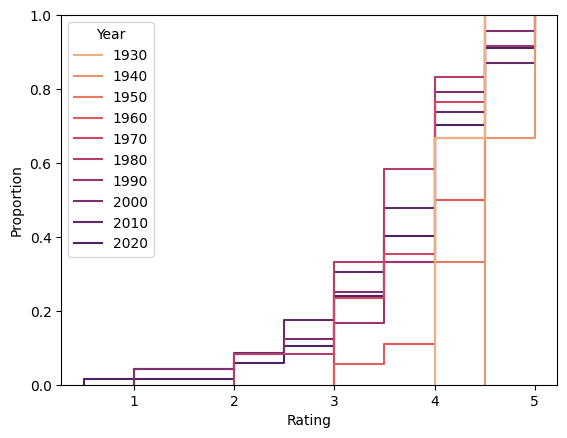

In [ ]:
sns.ecdfplot(data=films, x='Rating', hue='Year', palette='flare')

<Axes: xlabel='Rating', ylabel='Density'>

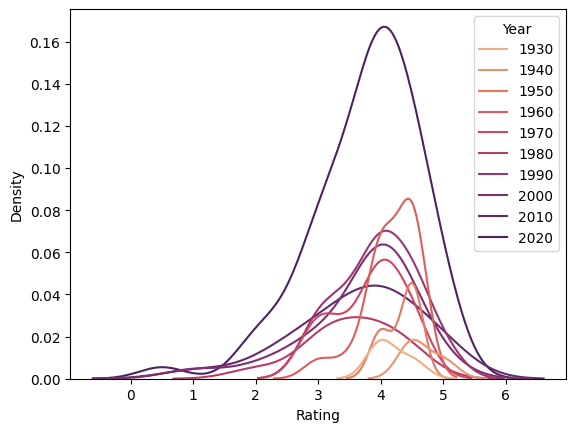

In [ ]:
sns.kdeplot(data=films, x='Rating', hue='Year', palette='flare')

In [ ]:
df3 = films[['Rating', 'Year']]
corr = df3.corr()
corr

,Rating,Year
Rating,1.000000,-0.185985
Year,-0.185985,1.000000


In [ ]:
px.scatter(films, x='Year', y='Rating', color='Year',trendline='ols')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Year=%{marker.color}<br>Rating=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': {'bdata': ('2gfaB9oH2gfkB7IH5AfkB4oH5AeKB+' ... 'fkB+QH5AfkB+QH5AeyB+QH5AfaBw=='),
                                   'dtype': 'i2'},
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': ('2gfaB9oH2gfkB7IH5AfkB4oH5AeKB+' ... 'fkB+QH5AfkB+QH5AeyB+QH5AfaBw=='),
                    'dtype': 'i2'},
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAAAAFEAAAAAAAAAUQAAAAAAAAB' ... 'AAAAxAAAAAAAAAEkAAAAAAAAAAQA=='),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': ('<b>OLS trendline</b><br>Rating' ... ' <b>(trend)</b><extra></extra>'),
              'legendgroup': '',
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': ('igeKB4oHlAeUB5QHngeeB54HngeeB5' ... 'fkB+QH5AfkB+QH5AfkB+QH5AfkBw=='),
                    'dtype': 'i2'},
              'xaxis': 'x',
              'y': {'bdata': ('HIxXqi7kEEAcjFeqLuQQQByMV6ou5B' ... 'mWew1A4HC4iZZ7DUDgcLiJlnsNQA=='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'Year'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Year'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Rating'}}}
})

_____________________________________________________________________________________________________

### Web Scraping

In [89]:
from bs4 import BeautifulSoup

In [90]:
url = 'https://boxd.it/jkPq'
myheaders  = {"User-Agent": "python-requests/2.32.5"}

#scrape boxd

r = requests.get(url, headers=myheaders)
r.text

'\n\n<!DOCTYPE html>\n\n<html id="html" lang="en" class="context-client-unknown no-mobile no-js">\n<head>\n\t<meta charset="UTF-8" />\n\t\n\t\n\t\t\t\n\t\t\n\t<meta name="viewport" content="width=1024" />\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\n\t<meta name="description" content="On an isolated island in Brittany at the end of the eighteenth century, a female painter is obliged to paint a wedding portrait of a young woman." />\n\t<meta property="og:type" content="video.movie" />\n\t\n\t<meta property="og:url" content="https://letterboxd.com/film/portrait-of-a-lady-on-fire/" />\n\t<meta property="og:title" content="Portrait of a Lady on Fire (2019)" />\n\t<meta property="og:description" content="On an isolated island in Brittany at the end of the eighteenth century, a female painter is obliged to paint a wedding portrait of a young woman." />\n\t<meta property="og:image" content="https://a.ltrbxd.com/resized/sm/upload/6s/c1/hx/il/portrait-of-lady-on-fire-120

In [91]:
filmSoup = BeautifulSoup(r.text, 'html.parser')


In [96]:
filmSoup


<!DOCTYPE html>

<html class="context-client-unknown no-mobile no-js" id="html" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=1024" name="viewport"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="On an isolated island in Brittany at the end of the eighteenth century, a female painter is obliged to paint a wedding portrait of a young woman." name="description"/>
<meta content="video.movie" property="og:type"/>
<meta content="https://letterboxd.com/film/portrait-of-a-lady-on-fire/" property="og:url"/>
<meta content="Portrait of a Lady on Fire (2019)" property="og:title"/>
<meta content="On an isolated island in Brittany at the end of the eighteenth century, a female painter is obliged to paint a wedding portrait of a young woman." property="og:description"/>
<meta content="https://a.ltrbxd.com/resized/sm/upload/6s/c1/hx/il/portrait-of-lady-on-fire-1200-1200-675-675-crop-000000.jpg?v=9e65e80a13" property="og:image"/><meta content="1200" p

In [ ]:

boo = filmSoup.find_all('a', attrs={'class':'text-slug'})
boo

[<a class="text-slug tooltip" href="/actor/noemie-merlant/" title="Marianne">Noémie Merlant</a>,
 <a class="text-slug tooltip" href="/actor/adele-haenel/" title="Héloïse">Adèle Haenel</a>,
 <a class="text-slug tooltip" href="/actor/luana-bajrami/" title="Sophie">Luàna Bajrami</a>,
 <a class="text-slug tooltip" href="/actor/valeria-golino/" title="La Comtesse">Valeria Golino</a>,
 <a class="text-slug tooltip" href="/actor/christel-baras/" title="La faiseuse d'ange">Christel Baras</a>,
 <a class="text-slug tooltip" href="/actor/armande-boulanger/" title="L'élève atelier">Armande Boulanger</a>,
 <a class="text-slug tooltip" href="/actor/guy-delamarche/" title="L'homme salon">Guy Delamarche</a>,
 <a class="text-slug tooltip" href="/actor/clement-bouyssou/" title="Le batelier">Clément Bouyssou</a>,
 <a class="text-slug" href="/director/celine-sciamma/">Céline Sciamma</a>,
 <a class="text-slug" href="/producer/benedicte-couvreur/">Bénédicte Couvreur</a>,
 <a class="text-slug" href="/producer

In [143]:
for x in boo: 
    if x.text in gen:
        print(x.text)
        

Drama
Romance
History


In [ ]:
#films['genres'] = films['Name'].apply(getGenres)

#### getGenres function

In [164]:
def getGenres (url):
    #init list for genres to go into  
    genre_list = []

    myheaders  = {"User-Agent": "python-requests/2.32.5"}
    r = requests.get(url)
    
    #all the html from the page
    filmSoup = BeautifulSoup(r.text, 'html.parser')

    #narrow it down
    lump = filmSoup.find_all('a', attrs={'class':'text-slug'})

    #get the genres and append to list 
    for x in lump: 
        if x.text in gen:
            genre_list.append(x.text)
    #return genres
    return genre_list